https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

In [3]:
!conda install numpy==1.23.4

Solving environment: done

# All requested packages already installed.



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

import scipy.stats as stats
import pylab 

import shap


/Users/keithlowton/anaconda3/envs/Regressions/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/keithlowton/anaconda3/envs/Regressions/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for deta

### Functions

In [5]:
#################################
### Variance inflation factor ###
#################################

def calculate_vif(features):
    vif = pd.DataFrame()
    vif["Features"] = features.columns
    vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]    
    return(vif)

In [6]:
##############################
### Min-Max transformation ###
##############################

def minmax_dset(dset,numeric_columns):

    dseta = dset.copy()
    dsetb = pd.DataFrame(transformer_train.transform(dseta[numeric_columns]))
    dsetb.columns = numeric_columns
    print(dsetb.shape)
    return dsetb

In [7]:
########################
### One hot encoding ###
########################

def ohe_dset(dset,categorical_columns):

    dseta = dset.copy()
    transformed_dset = ohe.fit_transform(dseta[categorical_columns])
    cat_data = pd.DataFrame(transformed_dset.toarray())
    cat_data.columns = ohe.get_feature_names_out(input_features=dseta[categorical_columns].columns)
    print(cat_data.shape)
    return cat_data

### Read the data

In [8]:
data = pd.read_csv('ds_salaries.csv', sep = ',')
print(data.shape)
data.head()

(3755, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [9]:
data = data.drop_duplicates()
print(data.shape)
data['level'] = 'Normal'
data.loc[data.job_title.str.contains('Principal'),'level'] = 'Principal'
data.loc[data.job_title.str.contains('Manager'),'level'] = 'Manager'
data.loc[data.job_title.str.contains('Lead'),'level'] = 'Lead'
data.loc[data.job_title.str.contains('Head'),'level'] = 'Head'
data.loc[data.job_title.str.contains('Director'),'level'] = 'Director'

data['role'] = data['level']
data.loc[data.job_title.str.contains('Engineer'),'role'] = 'Engineer'
data.loc[data.job_title.str.contains('Analyst'),'role'] = 'Analyst'
data.loc[data.job_title.str.contains('Developer'),'role'] = 'Developer'
data.loc[data.job_title.str.contains('Consultant'),'role'] = 'Consultant'
data.loc[data.job_title.str.contains('Technician'),'role'] = 'Technician'
data.loc[data.job_title.str.contains('Scientist'),'role'] = 'Scientist'
data.loc[data.job_title.str.contains('Data Scientist'),'role'] = 'Data Scientist'
data.loc[data.job_title.str.contains('Specialist'),'role'] = 'Specialist'
data.loc[data.job_title.str.contains('Researcher'),'role'] = 'Researcher'
data.loc[data.job_title.str.contains('Programmer'),'role'] = 'Programmer'
data.loc[data.job_title.str.contains('Architect'),'role'] = 'Architect'

(2584, 11)


In [10]:
for i in range(data.shape[1]):
    print(f"The number of unique classes for {data.columns[i]} is {data.iloc[:,i].nunique()}")
    if data.iloc[:,i].nunique() < 10:
        print(f"    The classes are {data.iloc[:,i].unique()}")

The number of unique classes for work_year is 4
    The classes are [2023 2022 2020 2021]
The number of unique classes for experience_level is 4
    The classes are ['SE' 'MI' 'EN' 'EX']
The number of unique classes for employment_type is 4
    The classes are ['FT' 'CT' 'FL' 'PT']
The number of unique classes for job_title is 93
The number of unique classes for salary is 815
The number of unique classes for salary_currency is 20
The number of unique classes for salary_in_usd is 1035
The number of unique classes for employee_residence is 78
The number of unique classes for remote_ratio is 3
    The classes are [100   0  50]
The number of unique classes for company_location is 72
The number of unique classes for company_size is 3
    The classes are ['L' 'S' 'M']
The number of unique classes for level is 6
    The classes are ['Principal' 'Normal' 'Manager' 'Head' 'Lead' 'Director']
The number of unique classes for role is 16


In [11]:
data.isna().mean().round(4) * 100

work_year             0.0
experience_level      0.0
employment_type       0.0
job_title             0.0
salary                0.0
salary_currency       0.0
salary_in_usd         0.0
employee_residence    0.0
remote_ratio          0.0
company_location      0.0
company_size          0.0
level                 0.0
role                  0.0
dtype: float64

### Graphs

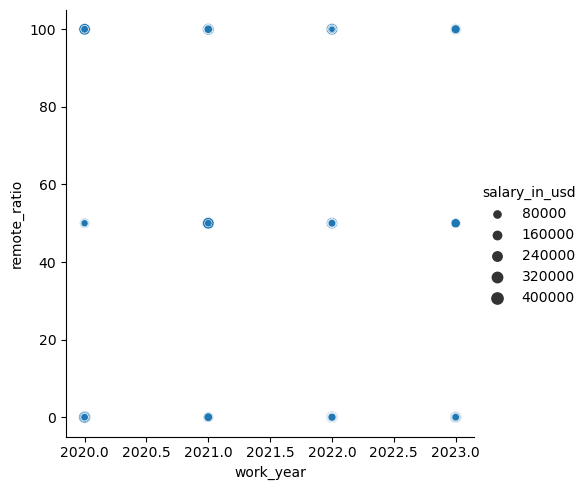

In [15]:
sns.relplot(x='work_year',
            y='remote_ratio',
            data=data,
            kind='scatter',
            size='salary_in_usd');

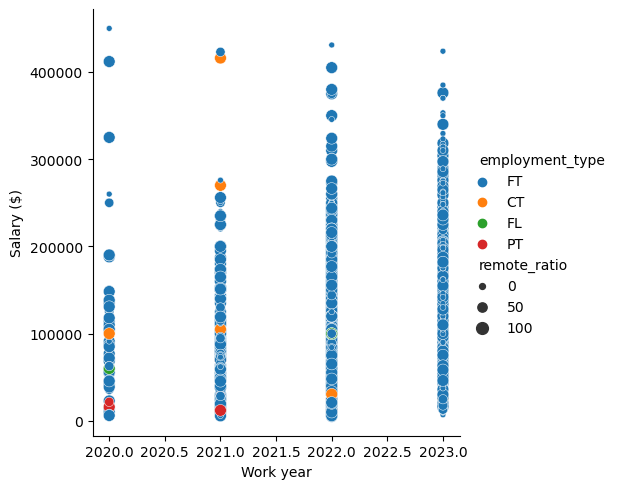

In [16]:
sns.relplot(x='work_year',
            y='salary_in_usd',
            data=data,
            kind='scatter',
            size='remote_ratio',
            hue='employment_type')
plt.ylabel("Salary ($)")
plt.xlabel("Work year")
plt.show();

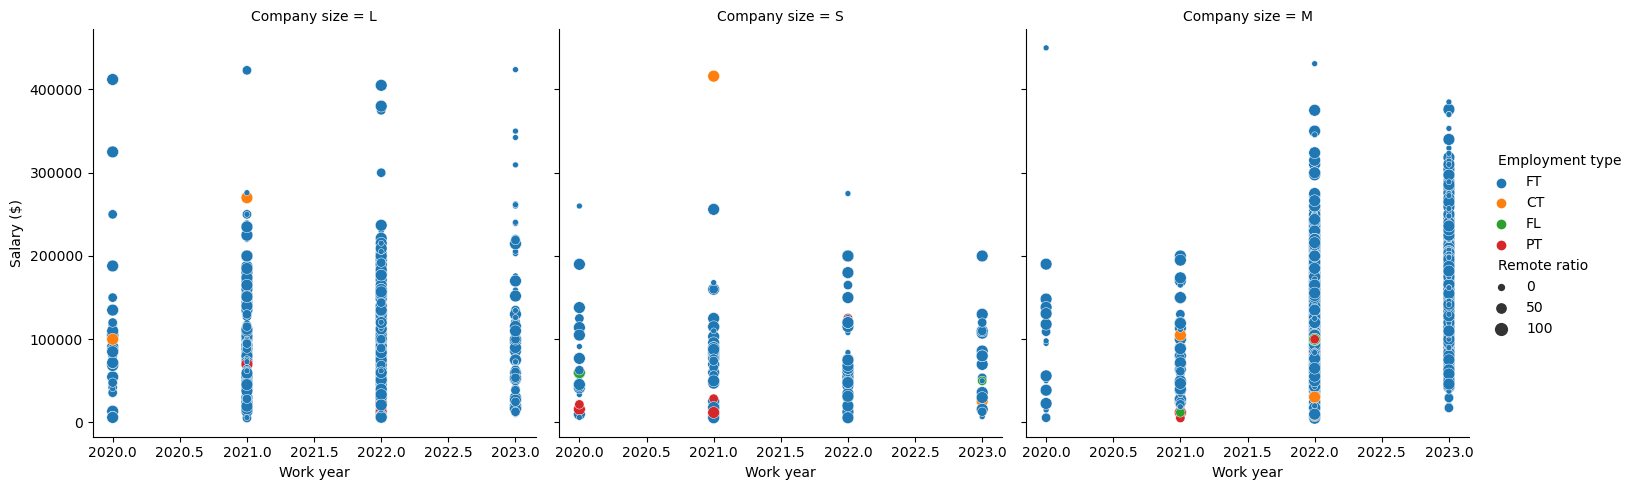

In [17]:
data_copy = data.copy()
data_copy.rename(columns = {'company_size':'Company size',
                            'salary_in_usd':'Salary ($)',
                            'work_year':'Work year',
                            'remote_ratio':'Remote ratio',
                            'employment_type':'Employment type'}, inplace = True)
sns.relplot(x='Work year',
            y='Salary ($)',
            data=data_copy,
            kind='scatter',
            size='Remote ratio',
            hue='Employment type',
            palette='tab10',
            col='Company size');
plt.show();

#### Boxplots

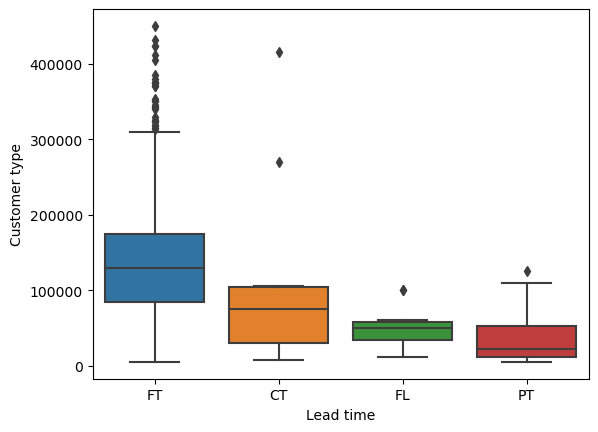

In [49]:
sns.boxplot(data=data, x="employment_type", y="salary_in_usd")
plt.xlabel("Lead time")
#plt.xticks(rotation=45)
plt.ylabel("Customer type")
plt.show()

#### Line plots

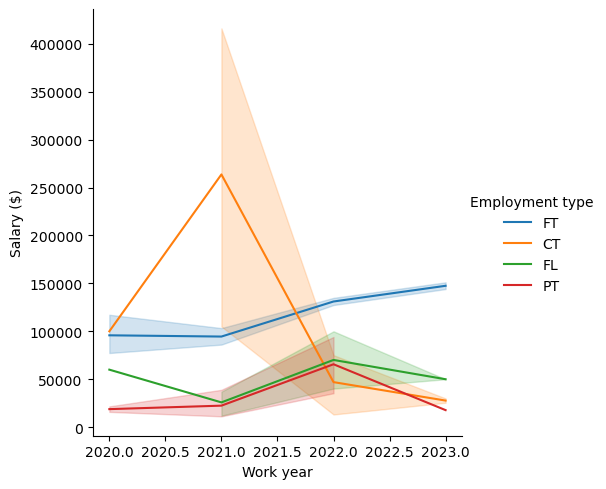

In [18]:
sns.relplot(x='Work year',
            y='Salary ($)',
            data=data_copy,
            kind='line',
            hue='Employment type')
plt.ylabel("Salary ($)")
plt.xlabel("Work year")
plt.show();

#### Heat maps

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`


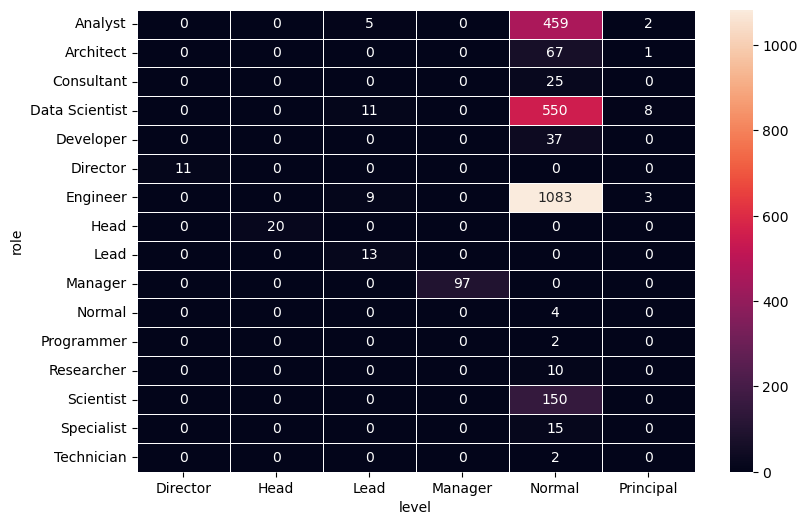

In [19]:
data_a = data.groupby(['level','role'])['salary_in_usd'].count()
data_a = data_a.reset_index()
data_a = data_a.pivot("role", "level", "salary_in_usd")
data_a.head()

for i in range(data_a.shape[1]):
    data_a.iloc[:,i] = data_a.iloc[:,i].fillna(0)
    data_a.iloc[:,i] = data_a.iloc[:,i].astype(int)

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(data_a, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.show();

#### Pie chart

In [20]:
c_loc = data.sort_values(by = 'company_location')
c_loc = c_loc.groupby(['company_location'])['salary_in_usd'].count()
c_loc = c_loc.reset_index()
c_loc['perc'] = c_loc['salary_in_usd']/data.shape[0] * 100
c_loc = c_loc.sort_values(by = 'perc', ascending = False)
c_loc['cum_perc'] = c_loc['perc'].cumsum() 
c_loc = c_loc.reset_index(drop=True)
c_loc = c_loc[c_loc.cum_perc < 90]


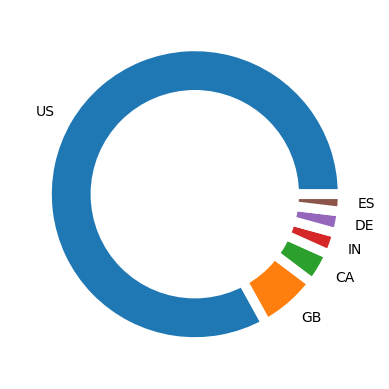

In [21]:
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(c_loc.perc, labels=c_loc.company_location, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

#### Compare plot

In [22]:
data_b = data.groupby(['role','company_location'])['salary_in_usd'].mean()
data_b = data_b.reset_index()
data_c = data_b[data_b.company_location.isin(list(c_loc.company_location))]
data_c = data_c.pivot("role", "company_location", "salary_in_usd")
data_c = data_c.reset_index()
data_c = data_c.sort_values("role", ascending=True)
for name in ['CA', 'DE', 'ES', 'GB', 'IN', 'US']:
    data_c.loc[:,name] = data_c.loc[:,name].fillna(0)
    data_c.loc[:,name] = data_c.loc[:,name].astype(int)


In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`


Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


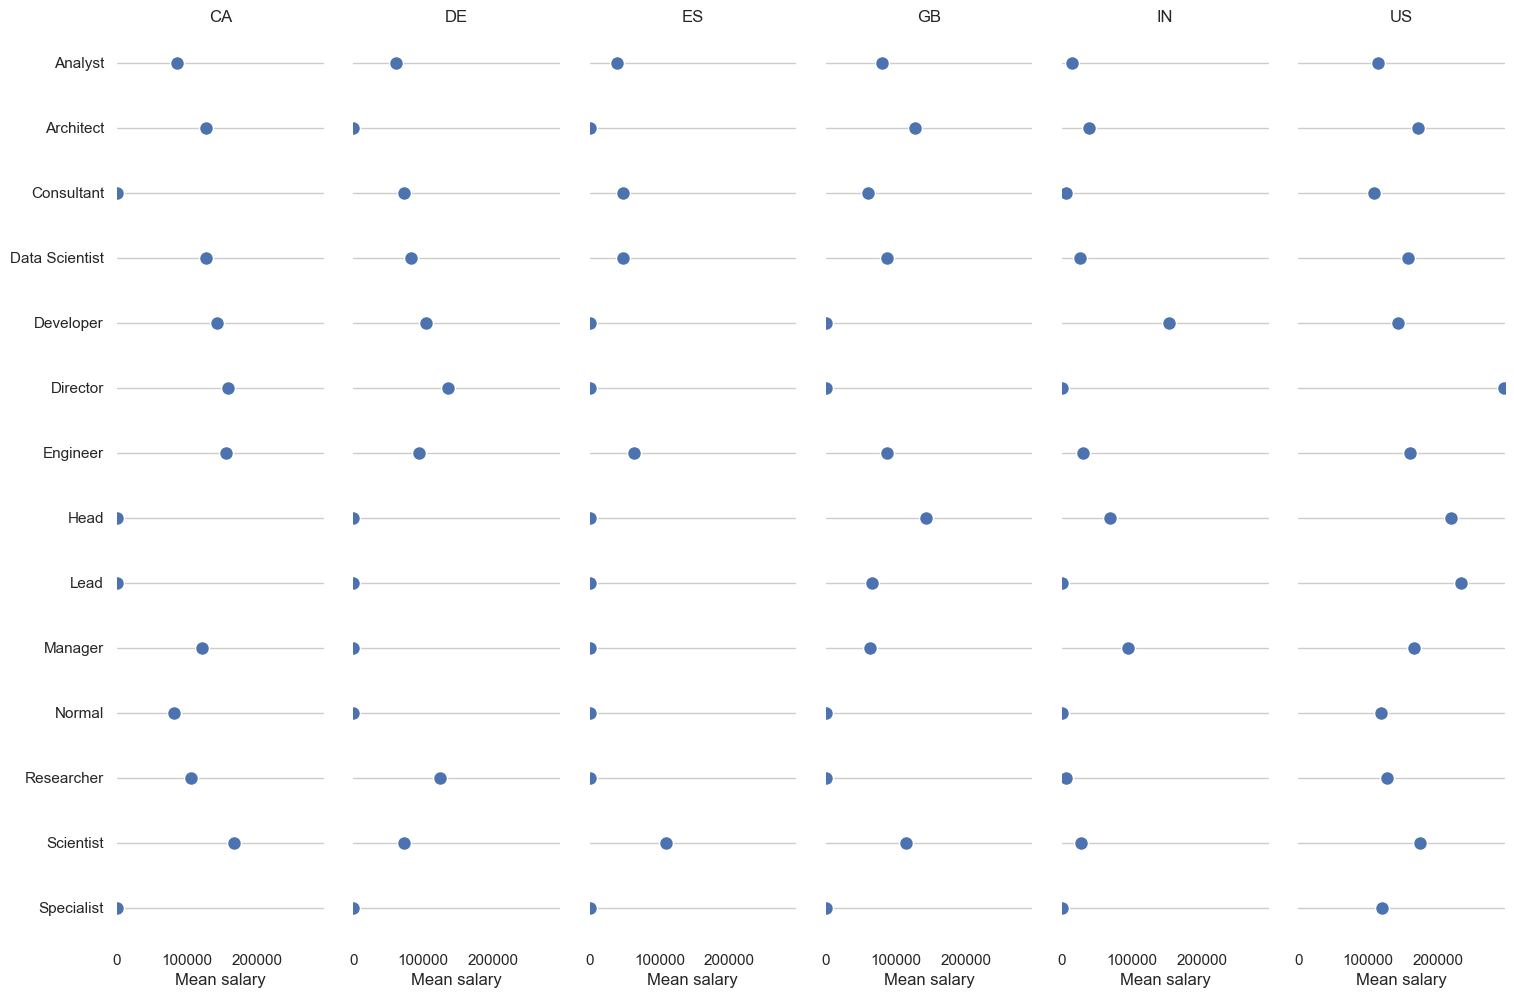

In [23]:
sns.set_theme(style="whitegrid")

# Make the PairGrid
g = sns.PairGrid(data_c,
                 x_vars=data_c.columns[1:], y_vars=["role"],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, max(data_c.max(axis = 1)) + 1000), xlabel="Mean salary", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["CA", "DE", "ES", "GB", "IN", "US"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

#### Histograms

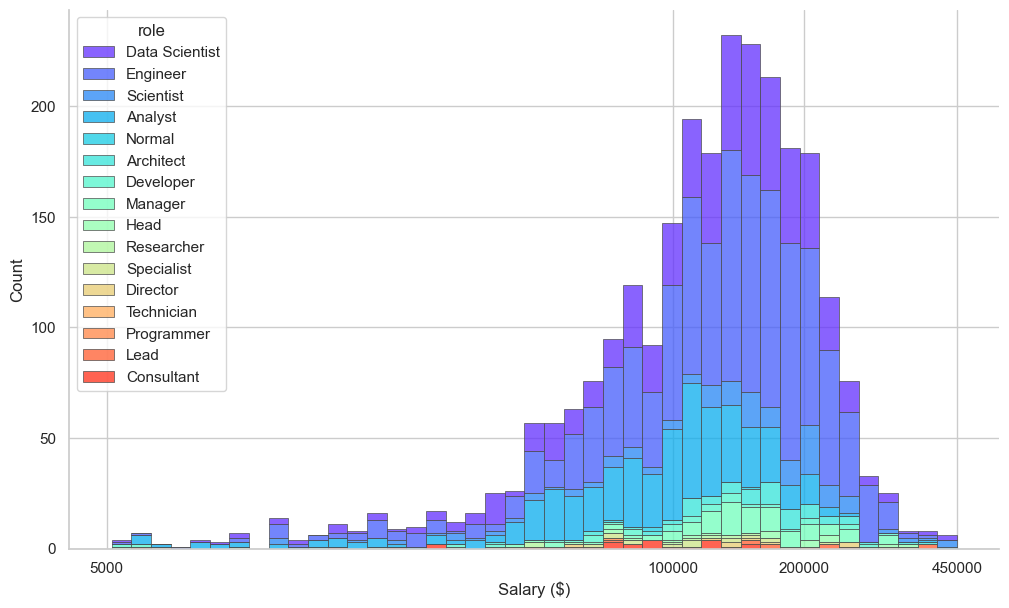

In [24]:
import matplotlib as mpl

f, ax = plt.subplots(figsize=(12,7))
sns.despine(f)

sns.histplot(
    data,
    x="salary_in_usd", hue="role",
    multiple="stack",
    palette="rainbow",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([5000, 100000, 200000, 450000])

plt.xlabel("Salary ($)")
plt.show();

### Prediction

In [50]:
mod_data = data.drop(['salary','salary_currency'], axis = 1)
for name in ['remote_ratio']:
    mod_data[name] = mod_data[name].astype(str)
mod_data = mod_data[mod_data.employment_type == 'FT']
y = mod_data.salary_in_usd
X = mod_data.drop(['salary_in_usd'], axis = 1)

#### Test-Train split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1782, 10) (765, 10) (1782,) (765,)


#### Numeric data

In [52]:
#########################
### Multicollinearity ###
#########################

num_cols = X_train.select_dtypes(include=np.number).columns.tolist()

vif = calculate_vif(X_train[num_cols])

a = vif[(vif.VIF > 10)]
to_drop_vif = list(a.Features)
print(to_drop_vif)
        


ValueError: zero-size array to reduction operation maximum which has no identity

In [53]:
try:
    X_train = X_train.drop(to_drop_vif, axis=1)
    X_test = X_test.drop(to_drop_vif, axis=1)
except:
    X_train = X_train
    X_test = X_test

In [54]:
#########################################
### Check for single non varying data ###
#########################################

lst = []
for name in list(X_train.columns):
    if (X_train[name].nunique() == 1):
        lst.append(name)

print(lst)

['employment_type']


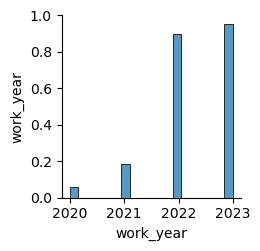

In [55]:
sns.pairplot(X_train[num_cols])
plt.show();

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


[]


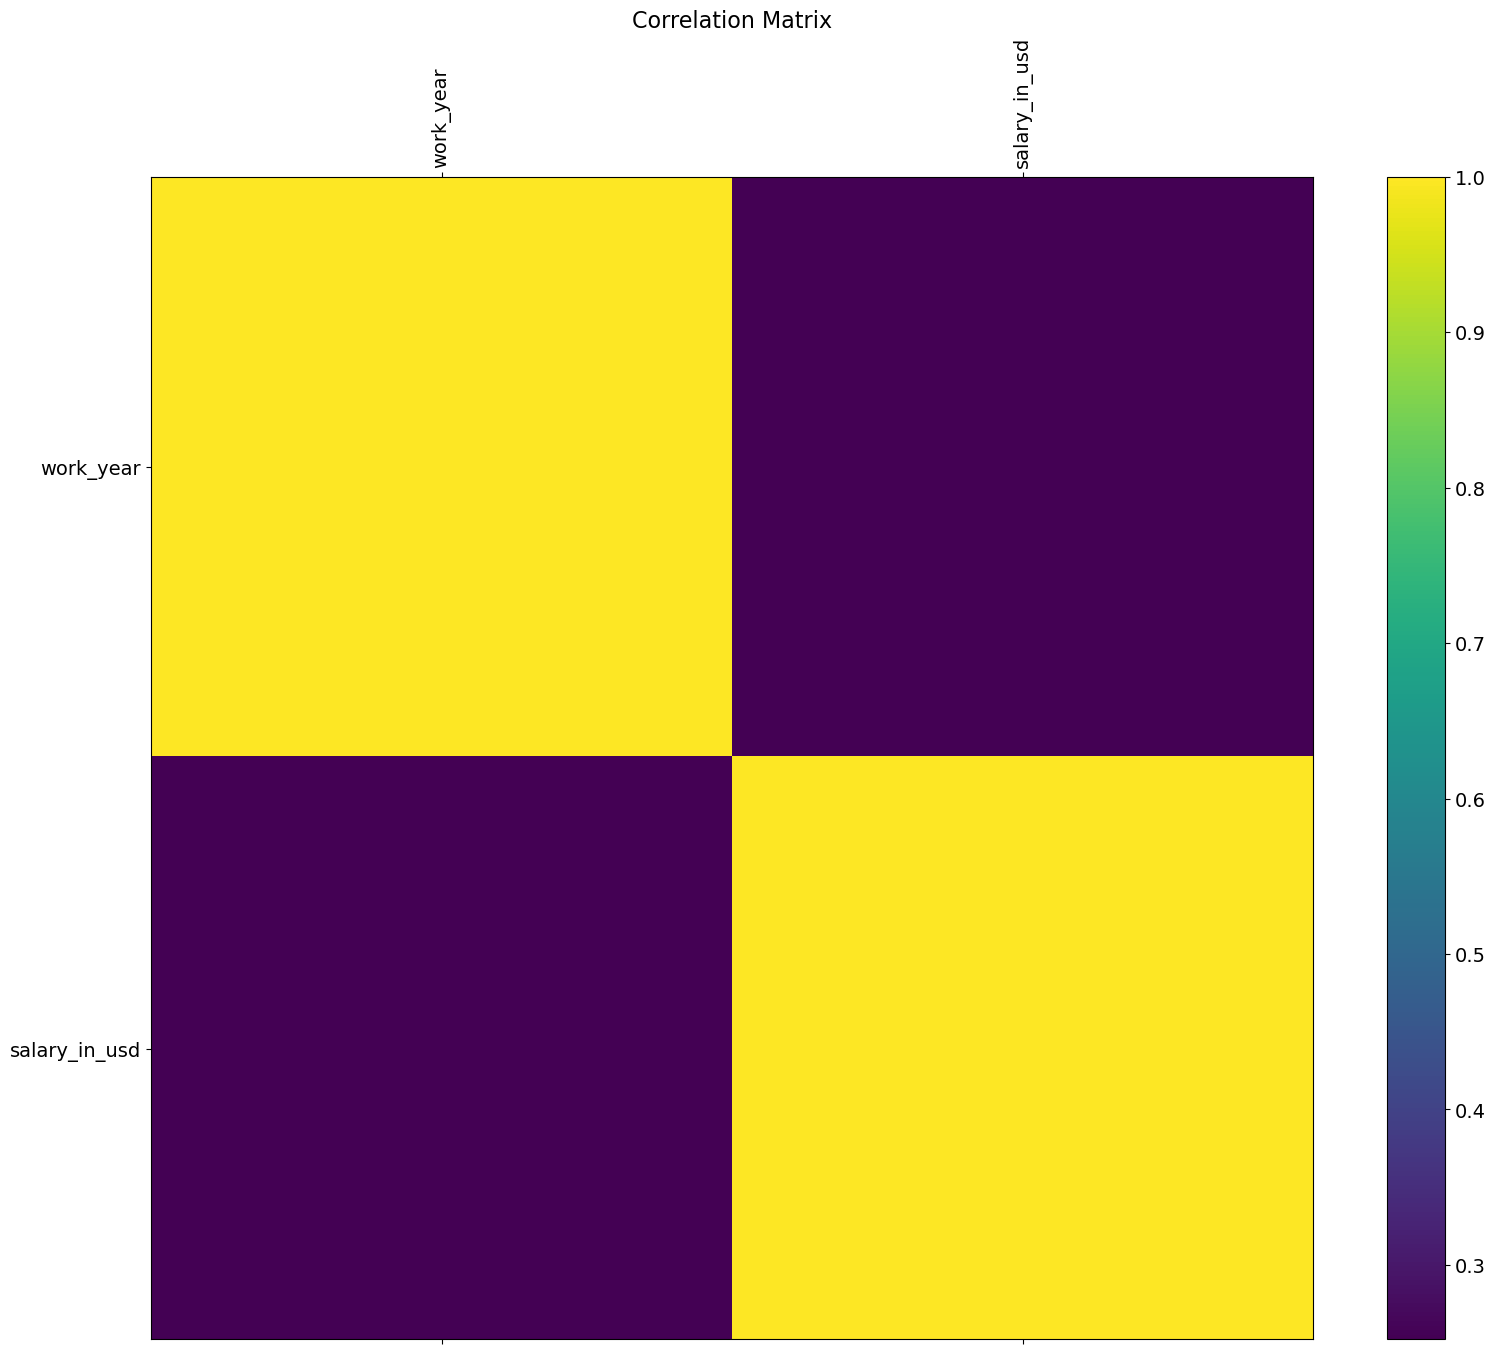

In [56]:
###################
### Correlation ###
###################

num_cols = list(X_train.select_dtypes(include=['number'], exclude=['datetime', 'timedelta']).columns)

corre_data = pd.concat([X_train[num_cols],
                        pd.DataFrame(y_train)],
                       axis = 1)

cor_matrix = corre_data.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
print(to_drop)

f = plt.figure(figsize=(19, 15))
plt.matshow(cor_matrix, fignum=f.number)
plt.xticks(range(corre_data.select_dtypes(['number']).shape[1]),
           corre_data.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(corre_data.select_dtypes(['number']).shape[1]),
           corre_data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show();

In [57]:
#####################
### MinMax scaler ###
#####################

num_cols = list(X_train.select_dtypes(include=['number'], exclude=['datetime', 'timedelta']).columns)

print(X_train[num_cols].shape)

transformer_train = MinMaxScaler().fit(X_train[num_cols])
num_data_train = pd.DataFrame(transformer_train.transform(X_train[num_cols]))
num_data_train.columns = num_cols
print(num_data_train.shape)

num_data_test = minmax_dset(X_test,num_cols) ### Test ###

(1782, 1)
(1782, 1)
(765, 1)


#### Categorical data

In [58]:
###################################
### High cardinality adjustment ###
###################################

cat_cols = list(X_train.select_dtypes(include=['object']))

card_vars = []
cat_data = X_train[cat_cols]
for i in range(cat_data.shape[1]):
    X_train.loc[X_train[cat_data.columns[i]].isnull(),cat_data.columns[i]] = 'Missing'
    X_test.loc[X_test[cat_data.columns[i]].isnull(),cat_data.columns[i]] = 'Missing'

    if (cat_data.iloc[:,i].nunique() > 60): 
        print(cat_data.columns[i],len(list(set(cat_data.iloc[:,i]))))

        a = pd.crosstab(cat_data[cat_data.columns[i]],columns='Count')
        a = pd.DataFrame(a).sort_values('Count',ascending=False).reset_index()
        val_list = list(a.iloc[:20,0])
        X_train.loc[~X_train[cat_data.columns[i]].isin(val_list),cat_data.columns[i]] = 'Other'
        X_test.loc[~X_test[cat_data.columns[i]].isin(val_list),cat_data.columns[i]] = 'Other'

    if (len(list(set(cat_data.iloc[:,i]))) > 100):
        card_vars.append(cat_data.columns[i])

print(card_vars)

job_title 83
employee_residence 66
company_location 64
[]


In [59]:
########################
### One hot encoding ###
########################

ohe = OneHotEncoder()
print(X_train.shape)
# (1808, 10)

### Train ###

ohe.fit(X_train[cat_cols])
colnames = ohe.get_feature_names_out(cat_cols)

cat_data_train = ohe_dset(X_train,cat_cols)  ### Train ###
cat_data_test = ohe_dset(X_test,cat_cols)    ### Test ###

(1782, 10)
(1782, 96)
(765, 91)


In [60]:
###########################
### Bring data together ###
###########################

print(cat_data_train.shape, num_data_train.shape)
cat_data_train = cat_data_train.reset_index()
num_data_train = num_data_train.reset_index()

X_train = pd.concat([cat_data_train,num_data_train],axis = 1)
print(X_train.shape)

print(cat_data_test.shape, num_data_test.shape)
cat_data_test = cat_data_test.reset_index()
num_data_test = num_data_test.reset_index()
X_test = pd.concat([cat_data_test,num_data_test],axis = 1)

print(X_train.shape, X_test.shape)

# (64215, 105) (42811, 103) (10148, 89)

(1782, 96) (1782, 1)
(1782, 99)
(765, 91) (765, 1)
(1782, 99) (765, 94)


In [61]:
####################################################
### Check that train/test sets have same columns ###
####################################################

mod_cols = (list(set(list(X_train.columns)) - set(['index'])))
X_train = X_train[mod_cols]
miss_lst = list(set(list(X_train.columns)) - set(list(X_test.columns)))

for name in miss_lst:
    X_test[name] = 0
X_test = X_test[list(X_train.columns)]

drop_test_lst = list(set(list(X_test.columns)) - set(list(X_train.columns)))
X_test = X_test.drop(drop_test_lst, axis = 1)

print(X_train.shape, X_test.shape)
# (64215, 105) (42811, 135) (10148, 107)

(1782, 97) (765, 97)


### Models

#### Gradient Boosting Regressor

In [62]:
# define model
gbr = GradientBoostingRegressor(random_state=0)

In [63]:
#define params
gbr_param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# create gridseatchobject
gbr_gridsearch = GridSearchCV(gbr, gbr_param_grid, cv=5)

# fit gridsearch
gbr_gridsearch.fit(X_train, y_train)

# print best params and validaton score
print("Best parameters: ", gbr_gridsearch.best_params_)
print("Cross Validation Score: ", gbr_gridsearch.best_score_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Cross Validation Score:  0.4405076729175675


In [64]:
#round(optimizer.max['params']['depth'],0)
gbr_gridsearch.best_params_['max_features']

'log2'

In [65]:
gbr_hyp = GradientBoostingRegressor(random_state=0,
                                    learning_rate = gbr_gridsearch.best_params_['learning_rate'],
                                    n_estimators = gbr_gridsearch.best_params_['n_estimators'],
                                    max_depth = gbr_gridsearch.best_params_['max_depth'],
                                    min_samples_split = gbr_gridsearch.best_params_['min_samples_split'],
                                    min_samples_leaf = gbr_gridsearch.best_params_['min_samples_leaf'],
                                    max_features = gbr_gridsearch.best_params_['max_features'])

In [66]:
gbr_valid_score = gbr_gridsearch.score(X_test, y_test)

print("Validation Score: ", gbr_valid_score)

Validation Score:  0.4129373526729996


In [67]:
gbr_hyp.fit(X_train, y_train)

y_pred = gbr_hyp.predict(X_test)

# get mae 
gbr_mae = mean_absolute_error(y_test, y_pred)
gbr_mae

38317.906854938075

In [73]:
gbr_rmse = mean_squared_error(y_test, y_pred, squared=False)
gbr_rmse

53187.08586324348

In [74]:
r2_score(y_test, y_pred)

0.4129373526729996

In [68]:
gbr_hyp

GradientBoostingRegressor(max_features='log2', min_samples_leaf=4,
                          n_estimators=200, random_state=0)

#### Residuals

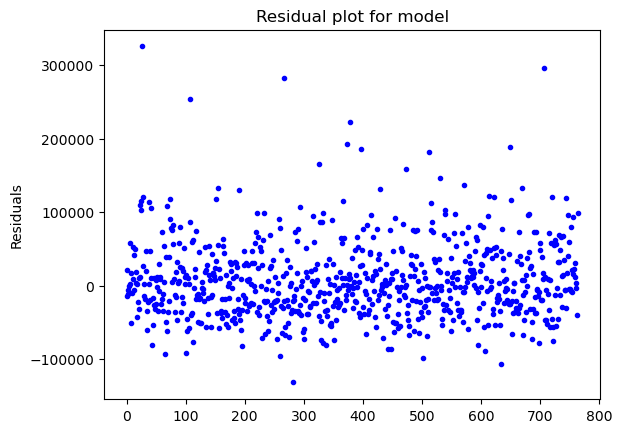

In [69]:
residual = y_test - y_pred
y_preds = pd.Series(y_pred)
y_preds.index = range(0,len(y_preds))
residual.index = range(0,len(residual))
a = pd.concat([residual,y_preds],axis=1,ignore_index=True)
resid_data = pd.DataFrame(a)
resid_data.columns = ['Residuals','Predicted']
plt.plot(resid_data['Residuals'], 'o', color='blue', markersize=3)
plt.title('Residual plot for model')
plt.ylabel('Residuals')
plt.show()

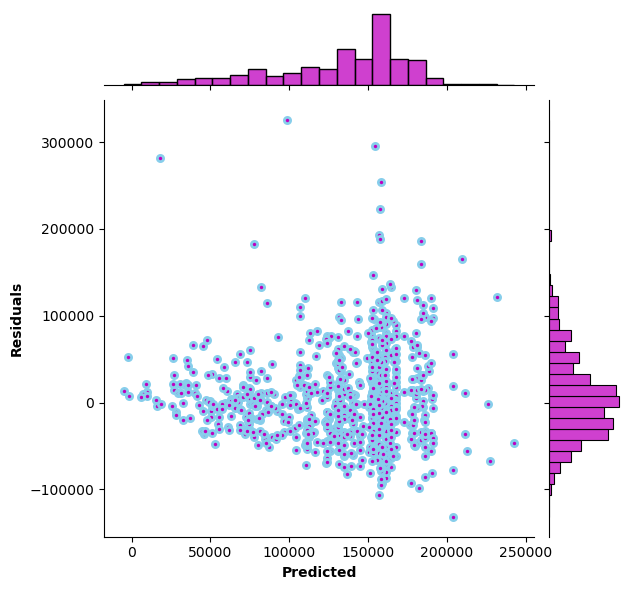

In [70]:
ax = sns.jointplot(x=resid_data['Predicted'], y=resid_data['Residuals'], kind='scatter', s=20, color='m', edgecolor="skyblue", linewidth=2)
ax.ax_joint.set_xlabel('Predicted', fontweight='bold')
ax.ax_joint.set_ylabel('Residuals', fontweight='bold')
plt.show()

This plot of residuals versus fits shows that the residual variance (vertical spread) increases as the fitted values (predicted values of sale price) increase. This violates the assumption of constant error variance.

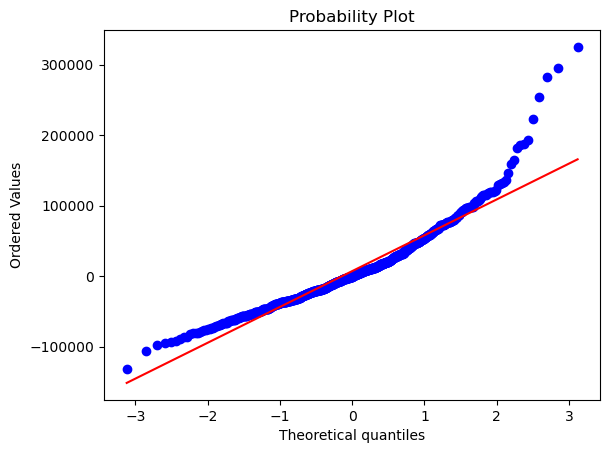

In [71]:
stats.probplot(resid_data['Residuals'], dist="norm", plot=pylab)
pylab.show()

The plot shows some deviation from the straight-line pattern indicating a distribution with heavier tails than a normal distribution.

#### Shapley values

In [39]:
gbr_hyp.fit(X_train, y_train);

# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(gbr_hyp)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation 
shap.initjs()

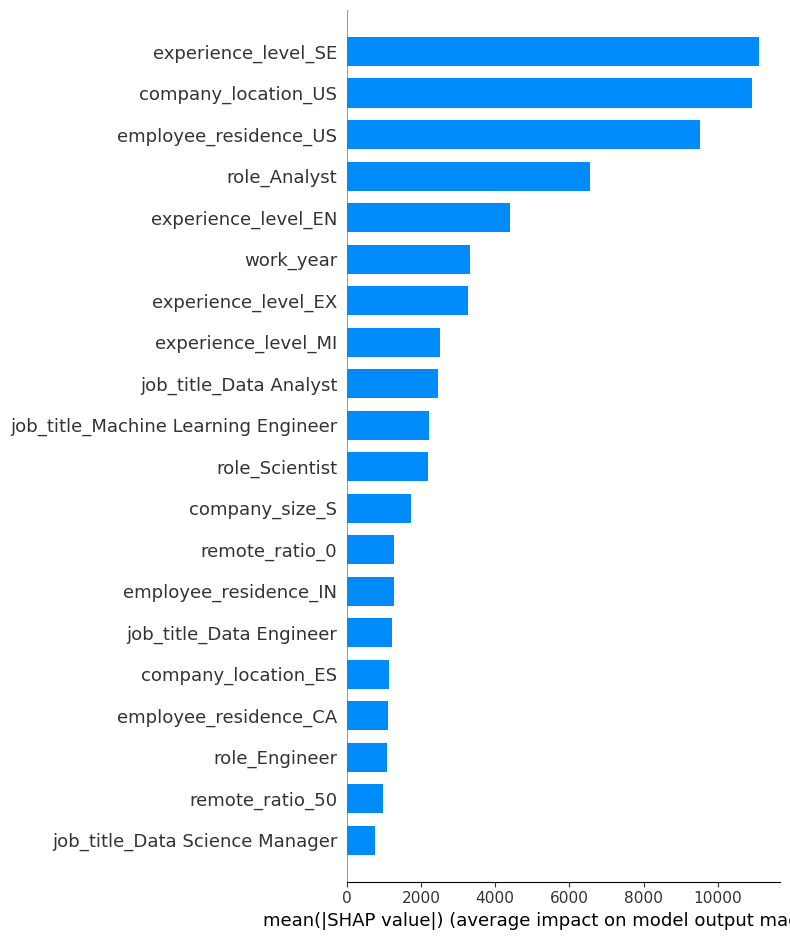

In [40]:
shap_values = shap.TreeExplainer(gbr_hyp).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


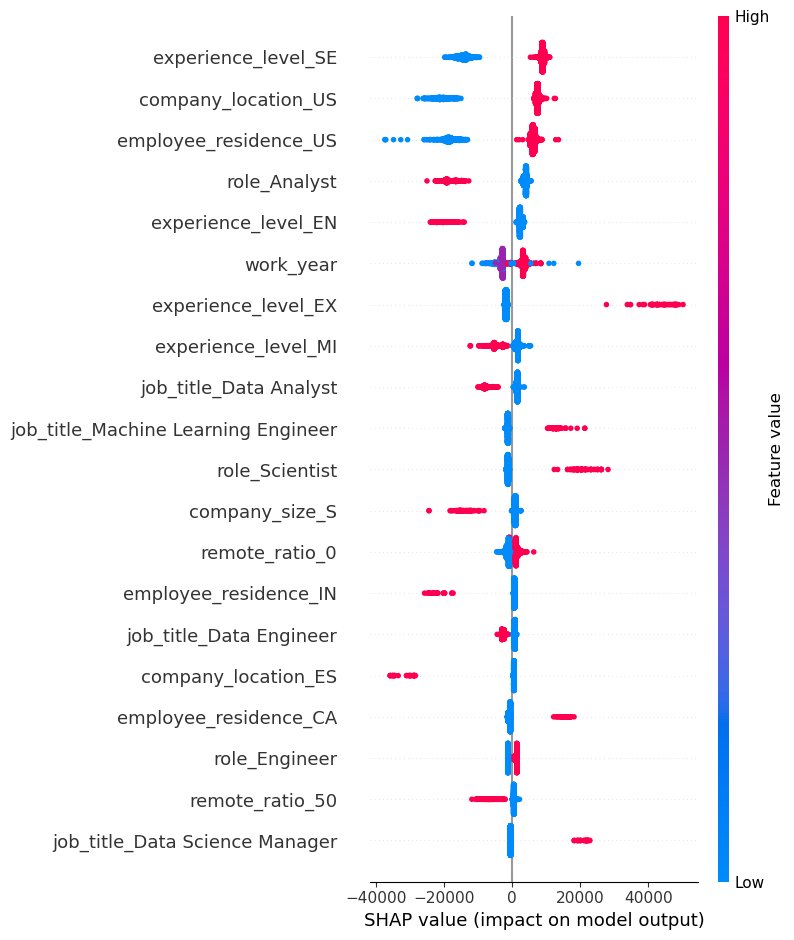

In [41]:
shap.summary_plot(shap_values, X_train)